# Подготовка

In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tikzplotlib
%matplotlib inline

Формат названий файлов со статистикой:

Количество деталей, размер детали, количество потоков (1 или 12), алгоритм (g - генетический, l - с циклическими ограничениями), метод сравнения деталей (s - LAB SSD, m - MGC), размер популяции (только для генетического алгоритма; количество поколений всегда 100), начальное значение ГПСЧ

Например: 432_28_12_g_s_10_1.csv

In [31]:
# Загрузка таблиц с заданным префиксом для всех начальных значений ГПСЧ
# Вычисление среднего значения и среднеквадратического отклонения в каждой клетке
def load_all_with_prefix(prefix, seed_start = 1, seed_end = 6):
    all_data = [pd.read_csv(f"{prefix}_{s}.csv") for s in range(seed_start, seed_end)]
    data = pd.concat(all_data).groupby(level = 0)
    return data.mean(), data.std()

# Определение параметров генетического алгоритма
## Точность и время работы в зависимости от размера популяции

In [32]:
# Вычисление точности и времени работы генетического алгоритма в зависимости от размера популяции
def get_results_by_population_size(prefix):
    tmp = []
    for sz in [10, 30, 100, 300, 1000]:
        data, _ = load_all_with_prefix(f"{prefix}_{sz}")
        # Столбцы для результатов прямого сравнения, сравнения по соседям, времени работы
        direct_cols = [col for col in data if col.startswith("direct")]
        neighbour_cols = [col for col in data if col.startswith("neighbour")]
        time_cols = [col for col in data if col.startswith("time")]
        # Среднее по результатам для последнего поколения
        direct_res = data[direct_cols].iloc[-1].mean()
        neighbour_res = data[neighbour_cols].iloc[-1].mean()
        # Среднее время работы на каждом изображении
        time_res = data[time_cols].sum().mean()
        tmp.append([sz, direct_res, neighbour_res, time_res])
    return pd.DataFrame(tmp, columns = ["size", "direct", "neighbour", "time"])

In [33]:
# График точности работы по вычисленным результатам
def plot_accuracy_by_population_size(res, file_name):
    sns.lineplot(data = res, x = "size", y = "direct")
    sns.lineplot(data = res, x = "size", y = "neighbour")
    plt.xscale("log")
    plt.xticks(res["size"].values.astype(float), res["size"].values.astype(int))
    plt.xlabel("Размер популяции")
    plt.ylabel("Точность (%)")
    plt.legend(["Прямое сравнение", "Сравнение по соседям"])
    tikzplotlib.save(file_name, strict = True)

In [34]:
# График времени работы по вычисленным результатам
def plot_time_by_population_size(res, file_name):
    sns.lineplot(data = res, x = "size", y = "time")
    plt.xscale("log")
    plt.xticks(res["size"].values.astype(float), res["size"].values.astype(int))
    plt.xlabel("Размер популяции")
    plt.ylabel("Время работы (с)")
    tikzplotlib.save(file_name, strict = True)

### Результаты для набора изображений с $N = 432$ и $K = 28$

In [35]:
res = get_results_by_population_size("432_28_12_g_s")

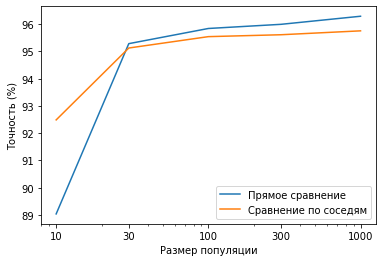

In [36]:
plot_accuracy_by_population_size(res, "plots/1.tex")

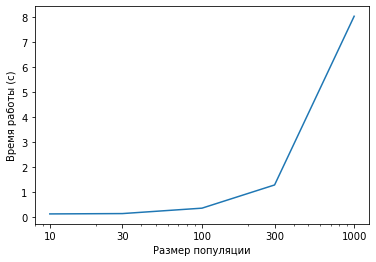

In [37]:
plot_time_by_population_size(res, "plots/2.tex")

### Результаты для набора изображений с $N = 3300$ и $K = 28$

In [38]:
res = get_results_by_population_size("3300_28_12_g_s")

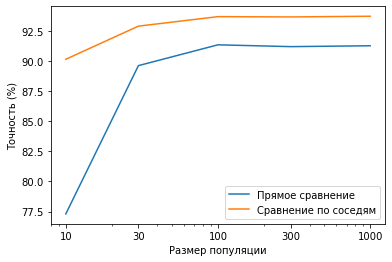

In [39]:
plot_accuracy_by_population_size(res, "plots/3.tex")

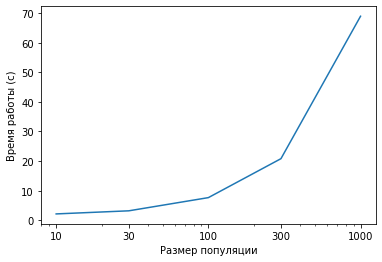

In [40]:
plot_time_by_population_size(res, "plots/4.tex")

## Точность и время работы в зависимости от количества поколений

In [41]:
# Вычисление точности и времени работы генетического алгоритма в зависимости от количества поколений
def get_results_by_generations_count(prefix):
    data, _ = load_all_with_prefix(prefix)
    # Столбцы для результатов прямого сравнения, сравнения по соседям, времени работы
    direct_cols = [col for col in data if col.startswith("direct")]
    neighbour_cols = [col for col in data if col.startswith("neighbour")]
    time_cols = [col for col in data if col.startswith("time")]
    # Для каждого поколения: средний результат по всем изображениям
    direct_res = data[direct_cols].mean(axis = 1)
    neighbour_res = data[neighbour_cols].mean(axis = 1)
    # Для каждого поколения: среднее время работы до этого поколения включительно по всем изображениям
    time_res = data[time_cols].mean(axis = 1).cumsum()
    return pd.DataFrame({"cnt": range(1, direct_res.size + 1), "direct": direct_res, "neighbour": neighbour_res, "time": time_res})

In [42]:
# График точности работы по вычисленным результатам
def plot_accuracy_by_generations_count(res, file_name):
    sns.lineplot(data = res, x = "cnt", y = "direct")
    sns.lineplot(data = res, x = "cnt", y = "neighbour")
    plt.xscale("log")
    ticks = [1, 2, 3, 5, 10, 30, 100]
    plt.xticks(ticks, ticks)
    plt.xlabel("Количество поколений")
    plt.ylabel("Точность (%)")
    plt.legend(["Прямое сравнение", "Сравнение по соседям"])
    tikzplotlib.save(file_name, strict = True)

In [43]:
# График времени работы по вычисленным результатам
def plot_time_by_generations_count(res, file_name):
    sns.lineplot(data = res, x = "cnt", y = "time")
    plt.xscale("log")
    ticks = [1, 2, 3, 5, 10, 30, 100]
    plt.xticks(ticks, ticks)
    plt.xlabel("Количество поколений")
    plt.ylabel("Время работы (с)")
    tikzplotlib.save(file_name, strict = True)

### Результаты для набора изображений с $N = 432$ и $K = 28$

In [44]:
res = get_results_by_generations_count("432_28_12_g_s_300")

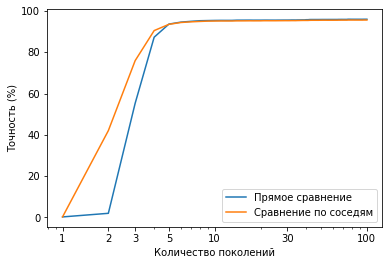

In [45]:
plot_accuracy_by_generations_count(res, "plots/5.tex")

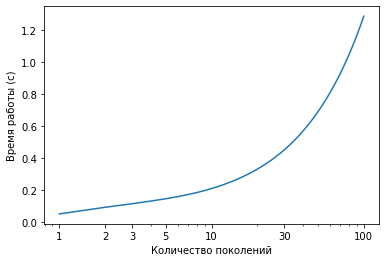

In [46]:
plot_time_by_generations_count(res, "plots/6.tex")

### Результаты для набора изображений с $N = 3300$ и $K = 28$

In [47]:
res = get_results_by_generations_count("3300_28_12_g_s_300")

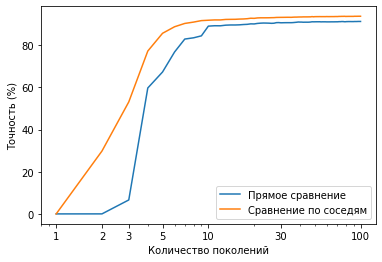

In [48]:
plot_accuracy_by_generations_count(res, "plots/7.tex")

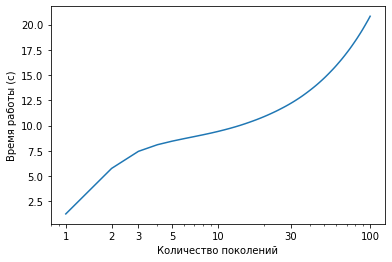

In [49]:
plot_time_by_generations_count(res, "plots/8.tex")

# Сравнение алгоритмов

In [50]:
# Вычисление точности и времени работы для всех конфигураций
def get_all_results(all_pieces, prefix, gen_cnt):
    tmp = []
    for pieces in all_pieces:
        data_mean_, data_std_ = load_all_with_prefix(f"{pieces}_{prefix}")
        data_mean, data_std = data_mean_[:gen_cnt], data_std_[:gen_cnt]
        # Столбцы для результатов прямого сравнения, сравнения по соседям, времени работы
        direct_cols = [col for col in data_mean if col.startswith("direct")]
        neighbour_cols = [col for col in data_mean if col.startswith("neighbour")]
        time_cols = [col for col in data_mean if col.startswith("time")]
        # Среднее по результатам для последнего поколения
        direct_res_mean = data_mean[direct_cols].iloc[-1].mean()
        direct_res_std = data_std[direct_cols].iloc[-1].mean()
        direct_res = "{0:.2f}".format(direct_res_mean) + " ± " + "{0:.2f}".format(direct_res_std)
        neighbour_res_mean = data_mean[neighbour_cols].iloc[-1].mean()
        neighbour_res_std = data_std[neighbour_cols].iloc[-1].mean()
        neighbour_res = "{0:.2f}".format(neighbour_res_mean) + " ± " + "{0:.2f}".format(neighbour_res_std)
        # Среднее время работы на каждом изображении
        time_res_mean = data_mean[time_cols].sum().mean()
        time_res_std = data_std[time_cols].sum().mean()
        time_res = "{0:.4f}".format(time_res_mean) + " ± " + "{0:.4f}".format(time_res_std)
        tmp.append([pieces, direct_res, neighbour_res, time_res])
    return pd.DataFrame(tmp, columns = ["Количество деталей", "Прямое сравнение (%)", "Сравнение по соседям (%)", "Время работы (с)"])

In [51]:
all_pieces = [432, 540, 805, 2360, 3300]

## Генетический алгоритм

In [52]:
res = get_all_results(all_pieces, "28_12_g_s_100", 30)
res.style.to_latex("tables/1.tex")
res

,Количество деталей,Прямое сравнение (%),Сравнение по соседям (%),Время работы (с)
0,432,95.71 ± 0.62,95.39 ± 0.42,0.1464 ± 0.0095
1,540,90.61 ± 0.93,93.25 ± 0.67,0.1963 ± 0.0125
2,805,94.36 ± 1.00,95.42 ± 0.54,0.3394 ± 0.0170
3,2360,86.31 ± 0.42,87.74 ± 0.57,2.7296 ± 0.0647
4,3300,90.47 ± 0.96,92.83 ± 0.73,4.8070 ± 0.1348


In [53]:
res = get_all_results(all_pieces, "28_12_g_s_300", 100)
res.style.to_latex("tables/2.tex")
res

,Количество деталей,Прямое сравнение (%),Сравнение по соседям (%),Время работы (с)
0,432,95.99 ± 0.60,95.61 ± 0.41,1.2852 ± 0.0574
1,540,90.80 ± 1.09,93.43 ± 0.54,1.5246 ± 0.0495
2,805,95.06 ± 0.63,95.70 ± 0.38,2.1743 ± 0.0603
3,2360,86.72 ± 0.58,88.13 ± 0.46,13.4461 ± 0.5043
4,3300,91.20 ± 0.14,93.67 ± 0.21,20.8256 ± 0.5604


In [54]:
res = get_all_results(all_pieces, "28_12_g_m_100", 30)
res.style.to_latex("tables/3.tex")
res

,Количество деталей,Прямое сравнение (%),Сравнение по соседям (%),Время работы (с)
0,432,96.22 ± 0.20,95.72 ± 0.15,0.3228 ± 0.0218
1,540,94.04 ± 0.73,96.29 ± 0.42,0.4312 ± 0.0326
2,805,95.26 ± 0.39,95.90 ± 0.29,0.8580 ± 0.0248
3,2360,93.07 ± 0.61,94.76 ± 0.40,7.5897 ± 0.0663
4,3300,93.75 ± 0.44,96.62 ± 0.08,14.2809 ± 0.0771


In [55]:
res = get_all_results(all_pieces, "28_12_g_m_300", 100)
res.style.to_latex("tables/4.tex")
res

,Количество деталей,Прямое сравнение (%),Сравнение по соседям (%),Время работы (с)
0,432,96.31 ± 0.09,95.77 ± 0.09,1.4344 ± 0.0609
1,540,94.06 ± 0.63,96.46 ± 0.32,1.7366 ± 0.0579
2,805,95.37 ± 0.30,96.05 ± 0.26,2.6372 ± 0.0591
3,2360,93.05 ± 0.92,94.97 ± 0.34,15.4857 ± 0.3672
4,3300,93.71 ± 1.19,96.63 ± 0.17,25.9687 ± 0.4778


## Алгоритм с циклическими ограничениями

In [56]:
res = get_all_results(all_pieces, "28_12_l_m", 1)
res.style.to_latex("tables/5.tex")
res

,Количество деталей,Прямое сравнение (%),Сравнение по соседям (%),Время работы (с)
0,432,94.98 ± 0.38,94.69 ± 0.12,0.3543 ± 0.0585
1,540,83.78 ± 0.99,92.67 ± 0.21,0.4745 ± 0.0144
2,805,88.73 ± 0.28,92.66 ± 0.33,0.9435 ± 0.0290
3,2360,88.12 ± 1.18,90.15 ± 0.87,11.6076 ± 0.2145
4,3300,88.92 ± 0.00,94.06 ± 0.03,23.6131 ± 0.0596


## Генетический алгоритм (1 поток)

In [57]:
res = get_all_results(all_pieces, "28_1_g_m_100", 30)
res.style.to_latex("tables/6.tex")
res

,Количество деталей,Прямое сравнение (%),Сравнение по соседям (%),Время работы (с)
0,432,96.22 ± 0.20,95.72 ± 0.15,1.7260 ± 0.0528
1,540,94.04 ± 0.73,96.29 ± 0.42,2.7940 ± 0.1327
2,805,95.26 ± 0.39,95.90 ± 0.29,7.3459 ± 0.1905
3,2360,93.07 ± 0.61,94.76 ± 0.40,63.7986 ± 0.4502
4,3300,93.75 ± 0.44,96.62 ± 0.08,122.6072 ± 0.6920


## Алгоритм с циклическими ограничениями (1 поток)

In [58]:
res = get_all_results(all_pieces, "28_1_l_m", 1)
res.style.to_latex("tables/7.tex")
res

,Количество деталей,Прямое сравнение (%),Сравнение по соседям (%),Время работы (с)
0,432,94.98 ± 0.38,94.69 ± 0.12,1.6512 ± 0.1661
1,540,83.78 ± 0.99,92.67 ± 0.21,2.8290 ± 0.1656
2,805,88.73 ± 0.28,92.66 ± 0.33,7.5731 ± 0.1340
3,2360,88.12 ± 1.18,90.15 ± 0.87,95.5544 ± 1.4664
4,3300,88.92 ± 0.00,94.06 ± 0.03,191.7477 ± 0.4806
